## Objective of the Assignment
### There are three main Objective into consideration.
### 1) Finding the top features, which helps in predicting the demand of BoomBikes.
### 2) Finding the Multi Linear Regression.
### 3) Calulate the R-sqaured score on the test data set to evaluate model

In [1]:
# import the libraries
import numpy as np
import pandas as pd

import datetime
from datetime import date
import calendar

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',500)

### Reading the dataset from CSV 

In [3]:
df = pd.read_csv("D:/ML&AI/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Analysing the dataset 

In [4]:
#check the shape of the dataframe
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Create new column for day
Weekday having day in number but it is not in sequence order for example 6 for Monday, 0 for Tuesday etc, So creating new column

In [7]:
# define function to get day from date column 
def findDay(date):
    day, month, year = (int(i) for i in date.split('-'))   
    born = datetime.date(year, month, day)
    return born.strftime("%A")

In [8]:
# create new column day in the dataset
df["day"] = df.dteday.apply(findDay)

In [9]:
# drop below column from the dataframe
# 1. instant -> This column is used for record index
# 2. dteday -> This datafrae is not time based scale, hence not in used
# 3. casual and registered -> As 'cnt' is the target variable and it is created by the addition of 'casual' and 'registered' columns
# 4. weekday -> As we have day column

df = df.drop(['instant', 'dteday', 'casual', 'registered', 'weekday'], axis=1)

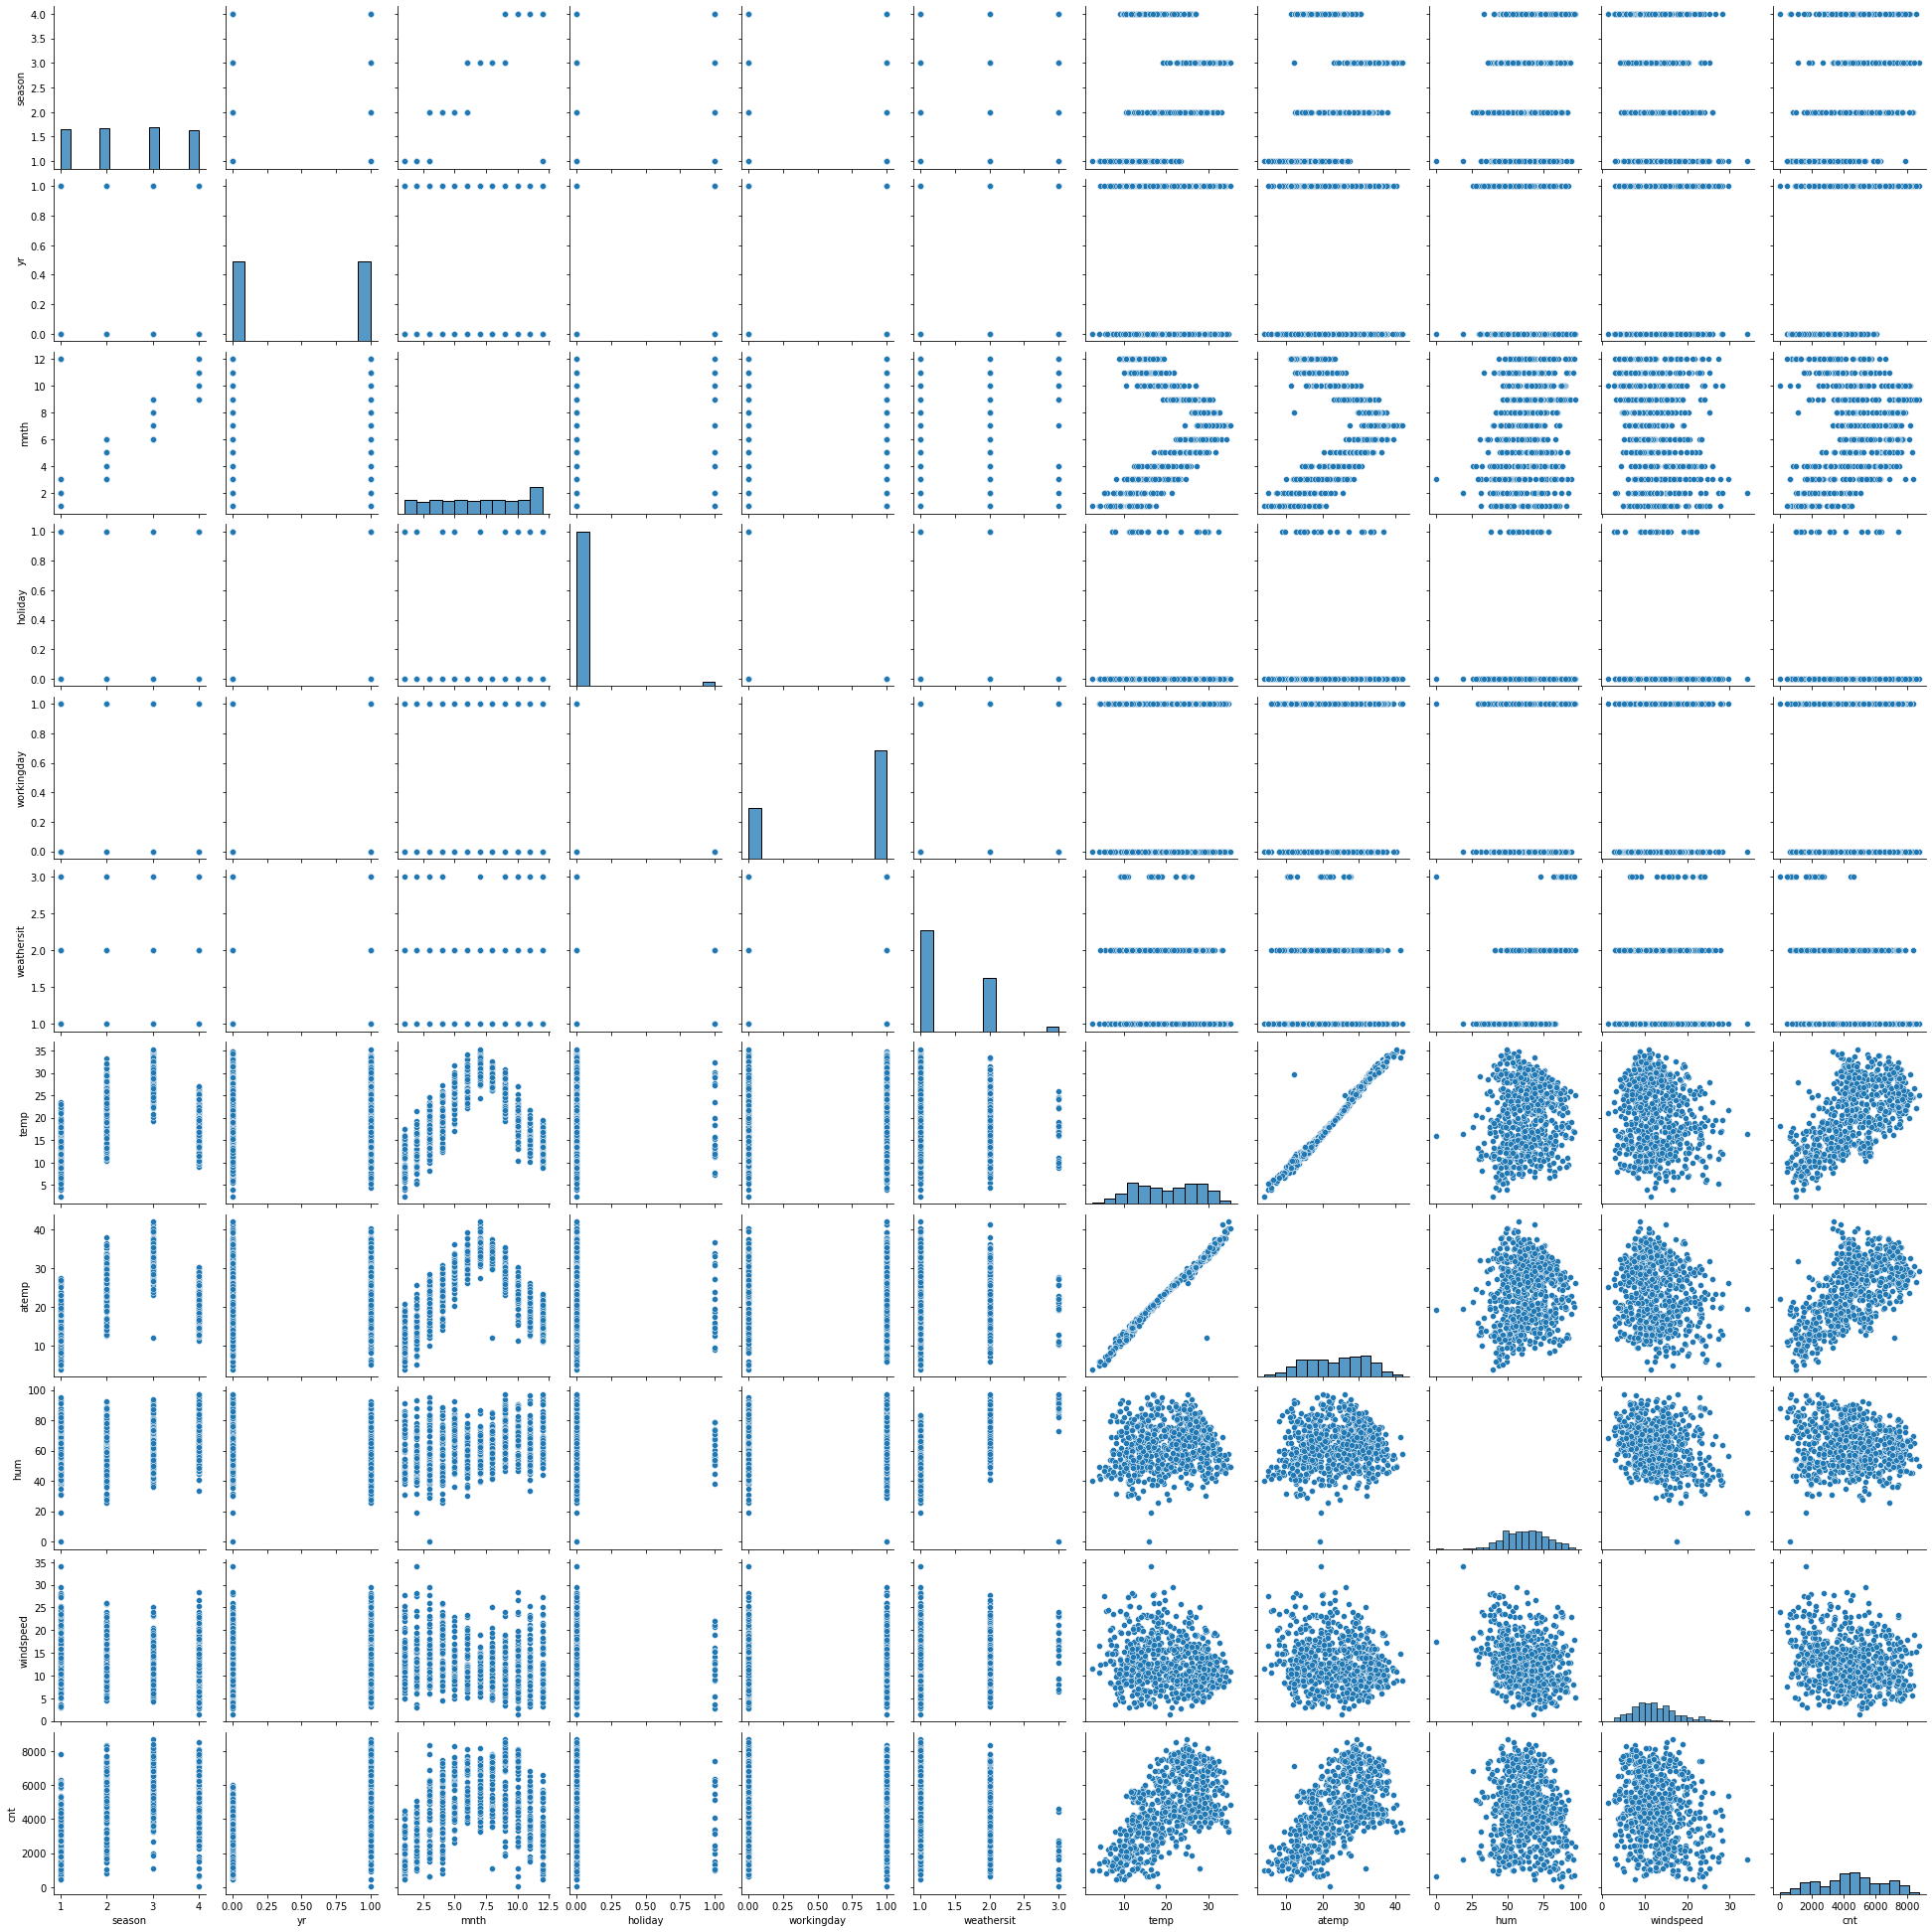

In [10]:
# Plotting the pairplot on numerical columns for analysing the data
sns.pairplot(df)
plt.show()

### From above pairplot, we can see there is strong correlation between temp and atemp, and there is correlation between cnt and (temp, atemp, month)
### There are relation between cnt and other feature but its not very clear and need further analysis.

<AxesSubplot:xlabel='cnt', ylabel='Density'>

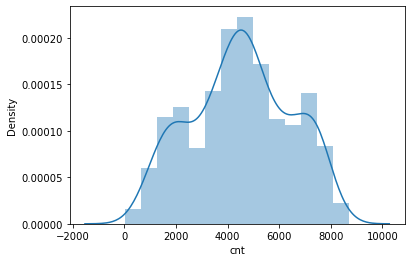

In [11]:
sns.distplot(df.cnt)

### From above plot, we can see that the cnt is normally distributed.
#### Below , categorical variable are analysed using boxplot

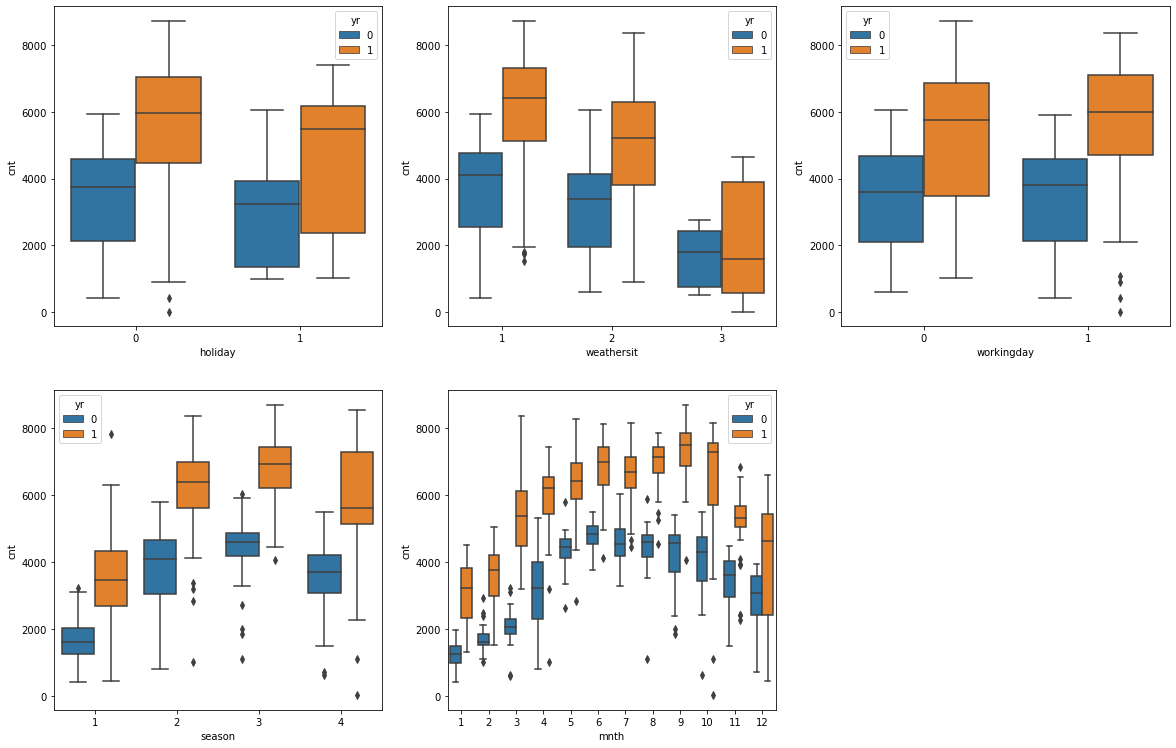

In [12]:
# visualising the categorical variables of the dataframe using boxplot
plt.figure(figsize=(20, 20))
plt.subplot(3, 3, 1)
sns.boxplot(x='holiday', y='cnt', hue='yr', data=df)
plt.subplot(3, 3, 2)
sns.boxplot(x='weathersit', y='cnt', hue='yr', data=df)
plt.subplot(3, 3, 3)
sns.boxplot(x='workingday', y='cnt', hue='yr', data=df)
plt.subplot(3, 3, 4)
sns.boxplot(x='season', y='cnt', hue='yr', data=df)
plt.subplot(3, 3, 5)
sns.boxplot(x='mnth', y='cnt', hue='yr', data=df)
plt.show()

#### From the above boxplot, it is clear that in year 2019 there were more business and if consider individual feature also then 'cnt' is more in 2019.
#### 'Holiday','workingday' don't have significant affect on 'cnt' but customer count have dependency on month,weather situation and season. Lets investigate further. It can be also observer thet there no significant outlier in the dataset.

### Define function for season, weathersit and mnth

In [13]:
# define function for the month like (1:January, 2:February....)
def getMonthName(val):
    if val == 1:
        return "January"
    elif val == 2:
        return "February"
    elif val == 3:
        return "March"
    elif val == 4:
        return "April"
    elif val == 5:
        return "May"
    elif val == 6:
        return "June"
    elif val == 7:
        return "July"
    elif val == 8:
        return "August"
    elif val == 9:
        return "September"
    elif val == 10:
        return "October"
    elif val == 11:
        return "November"
    elif val == 12:
        return "December"    

In [14]:
# define function for the season like (1:spring, 2:summer, 3:fall, 4:winter)
def getSeasonName(val):
    if val == 1:
        return "spring"
    elif val == 2:
        return "summer"
    elif val == 3:
        return "fall"
    elif val == 4:
        return "winter"

In [15]:
# define function for the weathersit
def getWeathersit(val):
    if val == 1:
        return "Clear"
    elif val == 2:
        return "Mist Cloudy"
    elif val == 3:
        return "Light Snow"
    elif val == 4:
        return "Heavy Rain"

In [16]:
# applied above function and convert into string
df["season"] = df.season.apply(getSeasonName)
df["weathersit"] = df.weathersit.apply(getWeathersit)
df["mnth"] = df.mnth.apply(getMonthName)

### Create dummy variables

In [17]:
# create dummy variables for season and delete redundant variable
season_dummy = pd.get_dummies(df['season'], drop_first=True)
season_dummy.shape

(730, 3)

In [18]:
# display the first five rows of season dummy variable
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [19]:
# create dummy variables for weathersit and delete redundant variable
weathersit_dummy = pd.get_dummies(df['weathersit'], drop_first=True)
weathersit_dummy.shape

(730, 2)

In [20]:
# display the first five rows of weathersit dummy variable
weathersit_dummy.head()

,Light Snow,Mist Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [21]:
# create dummy variables for month and delete redundant variable
mnth_dummy = pd.get_dummies(df['mnth'], drop_first=True)
mnth_dummy.shape

(730, 11)

In [22]:
# display the first five rows of month dummy variable
mnth_dummy.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [23]:
# create dummy variables for day and delete redundant variable
day_dummy = pd.get_dummies(df['day'], drop_first=True)
day_dummy.shape

(730, 6)

In [24]:
# display the first five rows of day dummy variable
day_dummy.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [25]:
# add season, weathersit, mnth and day dummy variables into the original dataframe
df = pd.concat([df, season_dummy, weathersit_dummy, mnth_dummy, day_dummy], axis = 1)

In [26]:
df.shape

(730, 34)

In [27]:
# drop season, weathersit, mnth and day columns from the dataframe, now it not needed
df = df.drop(['season', 'weathersit', 'mnth', 'day'], axis=1)

In [28]:
df.shape

(730, 30)

In [29]:
# Now let's see the head of our dataframe.
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist Cloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist Cloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.028767,0.336986,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.167266,0.473004,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting the Data into Training and Testing Sets

In [31]:
# splitting train and test data set, respectively and get shape of the data set
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features

We will use MinMax scaling.

In [32]:
scaler = MinMaxScaler()

In [33]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist Cloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [34]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist Cloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training the Model

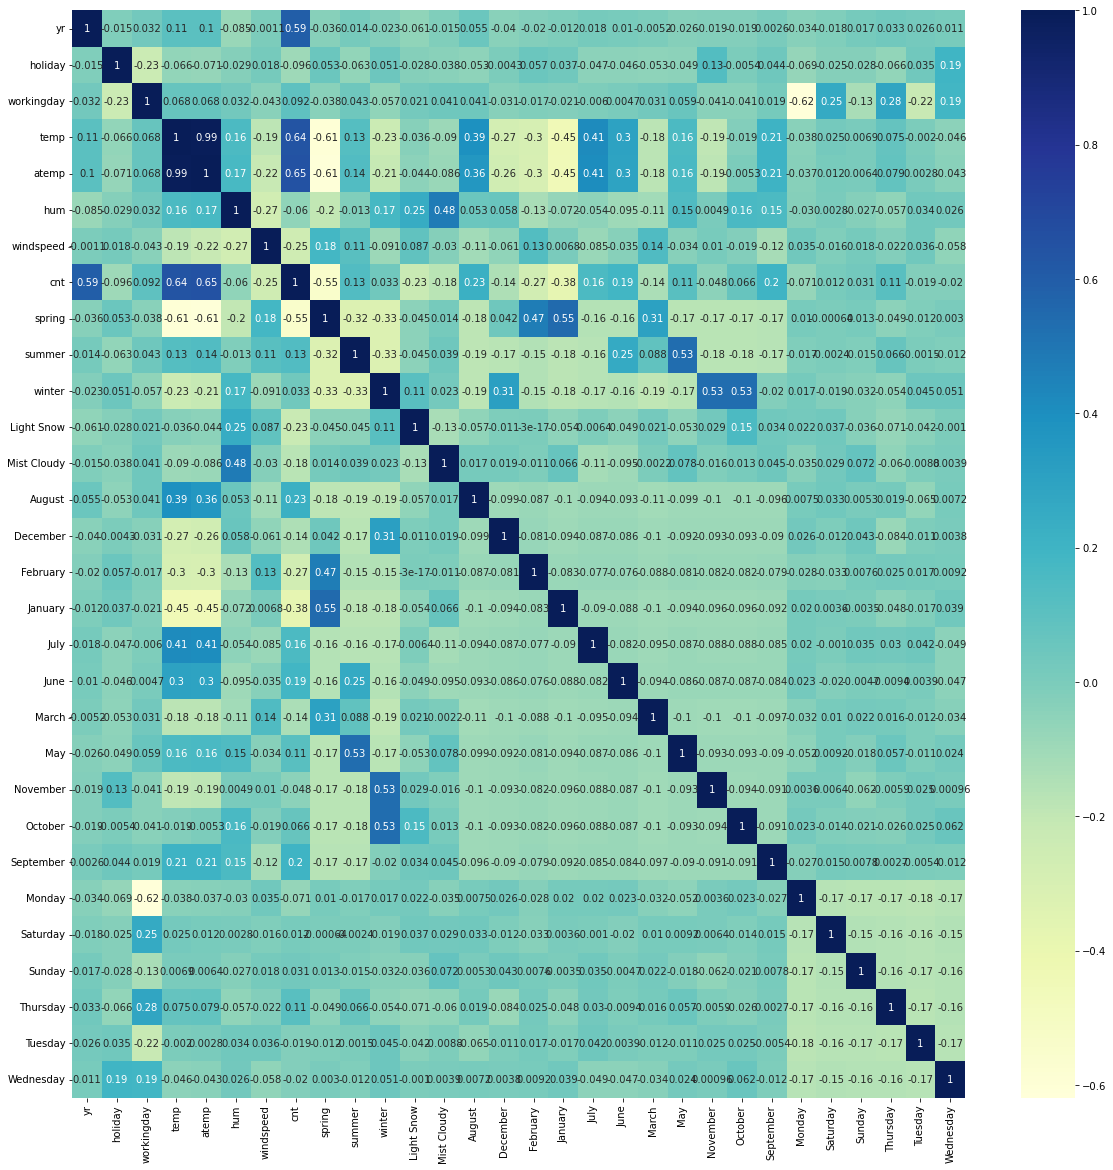

In [35]:
# let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Above can see 'cnt' have strong correction with 'temp' and 'atemp'

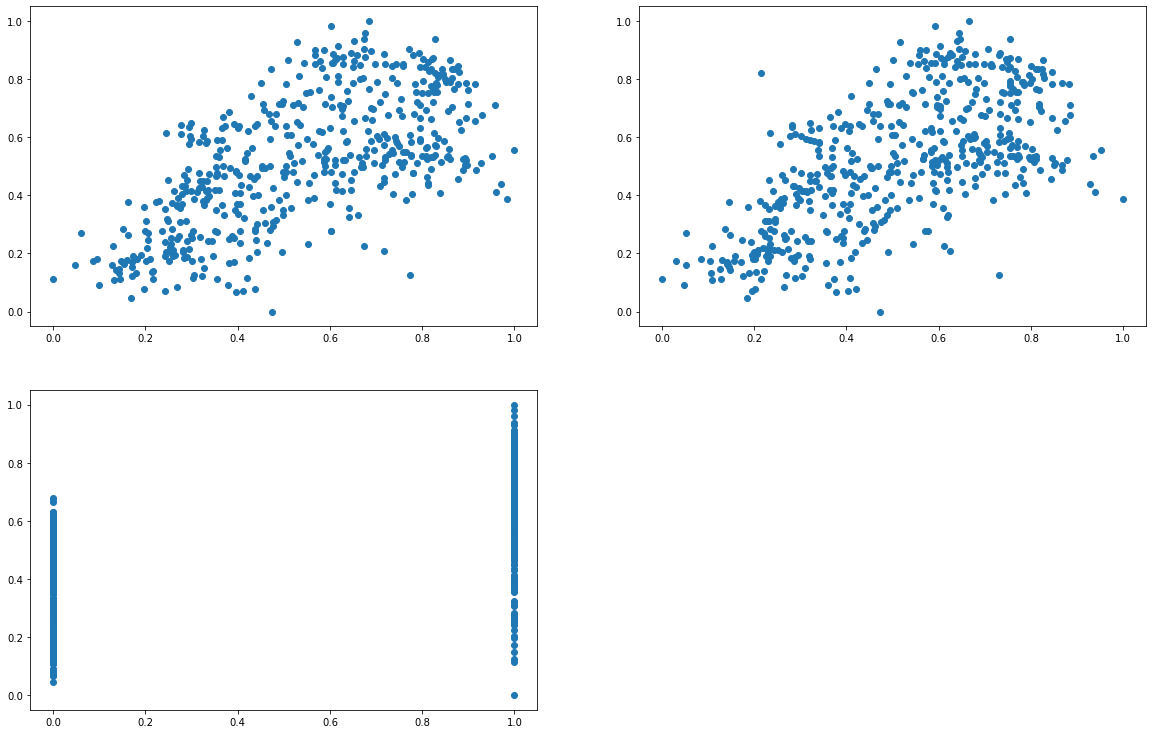

In [36]:
plt.figure(figsize=(20, 20))
plt.subplot(3,2,1)
plt.scatter(x='temp',y='cnt',data=df_train)
plt.subplot(3,2,2)
plt.scatter(x='atemp',y='cnt',data=df_train)
plt.subplot(3,2,3)
plt.scatter(x='yr',y='cnt',data=df_train)
plt.show()

### Dividing into X and y sets for the model building

In [37]:
X_train = df_train
y_train = df_train.pop('cnt')

In [38]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Light Snow,Mist Cloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [39]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Building the model

In [40]:
# Check all the columns of the dataframe
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Light Snow', 'Mist Cloudy',
       'August', 'December', 'February', 'January', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### I will use automated as well as manual approach for feature selection.
First I will select top 10 feature using RFE then use manual approach.

In [41]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 20),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist Cloudy', False, 2),
 ('August', False, 12),
 ('December', False, 6),
 ('February', False, 7),
 ('January', False, 4),
 ('July', True, 1),
 ('June', False, 18),
 ('March', False, 19),
 ('May', False, 11),
 ('November', False, 5),
 ('October', False, 15),
 ('September', True, 1),
 ('Monday', False, 10),
 ('Saturday', False, 17),
 ('Sunday', False, 14),
 ('Thursday', False, 16),
 ('Tuesday', False, 8),
 ('Wednesday', False, 13)]

In [43]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'Light Snow', 'July', 'September'],
      dtype='object')

### From above list, we  get Top 10 feature
### Now further manually analyse with Statsmodel. 

In [44]:
X_train_top10 = X_train[col]
X_train_top10 = sm.add_constant(X_train_top10)
X_train_top10.head()

,const,yr,holiday,temp,hum,windspeed,spring,winter,Light Snow,July,September
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0


In [45]:
lr = sm.OLS(y_train, X_train_top10).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.53e-184
Time:                        18:44:43   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3769      0.031     12.133      0.000       0.316       0.438
yr             0.2281      0.008     27.102      0.000       0.212       0.245
holiday       -0.0920      0.026     -3.472      0.001      -0.144      -0.040
temp           0.5147      0.031     16.542      0.000       0.454       0.576
hum           -0.2728      0.032     -8.542      0.000      -0.336      -0.210
windspeed     -0.1887      0.026     -7.194      0.000      -0.240      -0.137
spring        -0.1005      0.015     -6.536      0.000      -0.131      -0.070
winter         0.0653      0.013      5.153      0.000       0.040       0.090
Light Snow    -0.1980      0.026     -7.659      0.000      -0.249      -0.147
July          -0.0805      0.018     -4.538      0.000      -0.115      -0.046
September      0.0598      0.016      3.723      0.000       0.028       0.091
==============================================================================
Omnibus:                       51.023   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.492
Skew:                          -0.593   Prob(JB):                     1.51e-22
Kurtosis:                       4.823   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### With 10 variables, the R-squared = 0.83 and Adj. R-squared = 0.82.
### We can see that the p-value for all variables are less then 0.05. So can't decide aything. Need to check VIF of the variables

### Calculating the VIF now
### Dropping the constant before calculating VIF

In [46]:
X_train_top10 = X_train_top10.drop(['const'], axis=1)
VIF = pd.DataFrame()
VIF['Features'] = X_train_top10.columns
VIF['VIF'] = [round(variance_inflation_factor(X_train_top10.values, i),2) for i in range(X_train_top10.shape[1])]
VIF.sort_values(by='VIF',ascending=False)

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,spring,2.40
0,yr,2.06
6,winter,1.98
8,July,1.40
9,September,1.20
7,Light Snow,1.11
1,holiday,1.04


### From above VIF list, dropping 'hum' feature as its VIF > 5 and rebuild model

In [47]:
X_train_top9 = X_train_top10.drop(['hum'], axis=1)

In [48]:
X_train_top9 = sm.add_constant(X_train_top9)
lr = sm.OLS(y_train,X_train_top9).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.33e-171
Time:                        18:44:58   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2042      0.025      8.095      0.000       0.155       0.254
yr             0.2350      0.009     26.233      0.000       0.217       0.253
holiday       -0.0862      0.028     -3.041      0.002      -0.142      -0.030
temp           0.4758      0.033     14.453      0.000       0.411       0.540
windspeed     -0.1325      0.027     -4.879      0.000      -0.186      -0.079
spring        -0.1032      0.016     -6.274      0.000      -0.136      -0.071
winter         0.0504      0.013      3.754      0.000       0.024       0.077
Light Snow    -0.2562      0.027     -9.608      0.000      -0.309      -0.204
July          -0.0616      0.019     -3.272      0.001      -0.099      -0.025
September      0.0498      0.017      2.911      0.004       0.016       0.083
==============================================================================
Omnibus:                       62.894   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.633
Skew:                          -0.736   Prob(JB):                     4.71e-26
Kurtosis:                       4.823   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
X_train_top9 = X_train_top9.drop(['const'], axis=1)
VIF = pd.DataFrame()
VIF['Features'] = X_train_top9.columns
VIF['VIF'] = [round(variance_inflation_factor(X_train_top9.values, i),2) for i in range(X_train_top9.shape[1])]
VIF.sort_values(by='VIF',ascending=False)

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,spring,1.61
5,winter,1.37
7,July,1.34
8,September,1.20
6,Light Snow,1.06
1,holiday,1.04


### VIF of variable changed
### Now for all the features, VIF value is < 5

### Lets analyse by dropping 'holiday' features

In [50]:
X_train_top8 = X_train_top9.drop(['holiday'], axis=1)

In [51]:
X_train_top8 = sm.add_constant(X_train_top8)
lr = sm.OLS(y_train,X_train_top8).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     252.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.12e-170
Time:                        18:45:09   Log-Likelihood:                 450.22
No. Observations:                 510   AIC:                            -882.4
Df Residuals:                     501   BIC:                            -844.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2036      0.025      8.009      0.000       0.154       0.254
yr             0.2353      0.009     26.059      0.000       0.218       0.253
temp           0.4759      0.033     14.339      0.000       0.411       0.541
windspeed     -0.1341      0.027     -4.898      0.000      -0.188      -0.080
spring        -0.1058      0.017     -6.388      0.000      -0.138      -0.073
winter         0.0478      0.014      3.540      0.000       0.021       0.074
Light Snow    -0.2531      0.027     -9.421      0.000      -0.306      -0.200
July          -0.0610      0.019     -3.214      0.001      -0.098      -0.024
September      0.0467      0.017      2.712      0.007       0.013       0.081
==============================================================================
Omnibus:                       66.514   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.912
Skew:                          -0.762   Prob(JB):                     2.76e-28
Kurtosis:                       4.911   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
X_train_top8 = X_train_top8.drop(['const'], axis=1)
VIF = pd.DataFrame()
VIF['Features'] = X_train_top8.columns
VIF['VIF'] = [round(variance_inflation_factor(X_train_top8.values, i),2) for i in range(X_train_top8.shape[1])]
VIF.sort_values(by='VIF',ascending=False)

,Features,VIF
1,temp,4.40
2,windspeed,3.98
0,yr,2.06
3,spring,1.60
4,winter,1.36
6,July,1.34
7,September,1.19
5,Light Snow,1.06


### Lets dropping 'September' features and analyse again

In [53]:
X_train_top7 = X_train_top8.drop(['September'], axis=1)

In [54]:
X_train_top7 = sm.add_constant(X_train_top7)
lr = sm.OLS(y_train,X_train_top7).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     283.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          6.81e-170
Time:                        18:45:19   Log-Likelihood:                 446.50
No. Observations:                 510   AIC:                            -877.0
Df Residuals:                     502   BIC:                            -843.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.026      7.947      0.000       0.153       0.254
yr             0.2348      0.009     25.845      0.000       0.217       0.253
temp           0.4900      0.033     14.856      0.000       0.425       0.555
windspeed     -0.1409      0.027     -5.139      0.000      -0.195      -0.087
spring        -0.1069      0.017     -6.418      0.000      -0.140      -0.074
winter         0.0471      0.014      3.469      0.001       0.020       0.074
Light Snow    -0.2494      0.027     -9.237      0.000      -0.302      -0.196
July          -0.0709      0.019     -3.780      0.000      -0.108      -0.034
==============================================================================
Omnibus:                       64.231   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.636
Skew:                          -0.721   Prob(JB):                     1.17e-28
Kurtosis:                       4.993   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
X_train_top7 = X_train_top7.drop(['const'], axis=1)
VIF = pd.DataFrame()
VIF['Features'] = X_train_top7.columns
VIF['VIF'] = [round(variance_inflation_factor(X_train_top7.values, i),2) for i in range(X_train_top7.shape[1])]
VIF.sort_values(by='VIF',ascending=False)

,Features,VIF
1,temp,3.96
2,windspeed,3.93
0,yr,2.06
3,spring,1.60
4,winter,1.36
6,July,1.29
5,Light Snow,1.06


### Lets dropping 'winter' features and analyse again

In [56]:
X_train_top6 = X_train_top7.drop(['winter'], axis=1)

In [57]:
X_train_top6 = sm.add_constant(X_train_top6)
lr = sm.OLS(y_train,X_train_top6).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.37e-168
Time:                        18:45:31   Log-Likelihood:                 440.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     503   BIC:                            -837.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2596      0.020     12.986      0.000       0.220       0.299
yr             0.2360      0.009     25.713      0.000       0.218       0.254
temp           0.4279      0.028     15.277      0.000       0.373       0.483
windspeed     -0.1524      0.028     -5.536      0.000      -0.206      -0.098
spring        -0.1413      0.014    -10.427      0.000      -0.168      -0.115
Light Snow    -0.2413      0.027     -8.873      0.000      -0.295      -0.188
July          -0.0715      0.019     -3.769      0.000      -0.109      -0.034
==============================================================================
Omnibus:                       54.941   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.150
Skew:                          -0.657   Prob(JB):                     1.09e-22
Kurtosis:                       4.742   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
X_train_top6 = X_train_top6.drop(['const'], axis=1)
VIF = pd.DataFrame()
VIF['Features'] = X_train_top6.columns
VIF['VIF'] = [round(variance_inflation_factor(X_train_top6.values, i),2) for i in range(X_train_top6.shape[1])]
VIF.sort_values(by='VIF',ascending=False)

,Features,VIF
1,temp,3.95
2,windspeed,3.72
0,yr,2.03
3,spring,1.49
5,July,1.26
4,Light Snow,1.04


### After dropping the above three features, we can see that R-Squared and Adj R-squared both decrease by approx 1%, which is managable.
### Now, R-Squared = 0.79 and Adj R-squared = 0.79

### Residual Analysis

In [59]:
X_train_top6 = sm.add_constant(X_train_top6)

In [60]:
X_train_top6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       510 non-null    float64
 1   yr          510 non-null    int64  
 2   temp        510 non-null    float64
 3   windspeed   510 non-null    float64
 4   spring      510 non-null    uint8  
 5   Light Snow  510 non-null    uint8  
 6   July        510 non-null    uint8  
dtypes: float64(3), int64(1), uint8(3)
memory usage: 21.4 KB


In [61]:
y_train_pred = lr.predict(X_train_top6)

In [62]:
y_train_pred.shape

(510,)

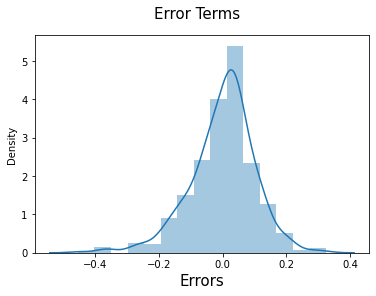

In [63]:
res = y_train - y_train_pred
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 15)         # X-label
plt.show()

#### From above plot we can see normal distribution of resdiual.

In [64]:
top_feature = X_train_top6.columns
top_feature = top_feature.drop('const')
top_feature

Index(['yr', 'temp', 'windspeed', 'spring', 'Light Snow', 'July'], dtype='object')

### Step 4: Predictions and Evaluation of Test Test

In [65]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist Cloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [66]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist Cloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.027397,0.319635,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.163612,0.467403,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
X_test = df_test
y_test = df_test.pop('cnt')

In [68]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Light Snow,Mist Cloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


### Building the model

In [69]:
X_test_sm = X_test_sm[top_feature]
X_test_sm = sm.add_constant(X_test_sm)

In [70]:
y_pred = lr.predict(X_test_sm)

### Evaluating model

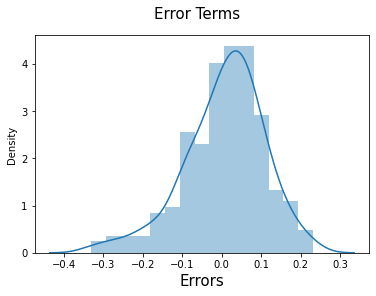

In [71]:
residual = y_test - y_pred
fig = plt.figure()
sns.distplot(residual, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 15)         # X-label
plt.show()

In [72]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7802124353228018

### We can see the R-square on test data is 0.78 and R-square on train data is 0.79 which is very similar. The model prediction on test set is similar to prediction on train test.

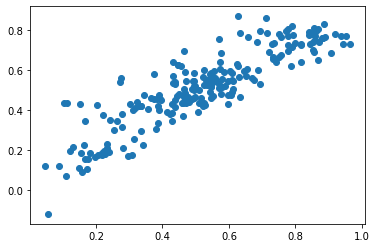

In [73]:
fig = plt.figure()
plt.scatter(y_test,y_pred)

#### The equation of best fitted line is
##### cnt = 0.2360 * yr + 0.4279 * temp  - 0.1524 *  windspeed - 0.1413 *  spring - 0.2413 * Light Snow -  0.0709 *  July

### Inferances:
#### 1) As the temperature Increase, demand of bike increases and vice versa.
#### 2) In the spring season, demand decreases.
#### 3) In the July month, demand decreases.
#### 4) In weather like 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds' the demand decreases.
#### 5) In 2019, demand increase then 2018
#### 6) The R-Squared value on test data is 0.78 and R-square on train data is 0.79
#### 7) cnt = 0.2360 * yr + 0.4279 * temp  - 0.1524 *  windspeed - 0.1413 *  spring - 0.2413 * Light Snow -  0.0709 *  July